In [52]:
%matplotlib widget
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [53]:
import numpy as np
import pandas as pd

In [54]:
import datetime as dt

In [65]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import distinct

In [56]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [57]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [58]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [59]:
# Save references to each table
S = Base.classes.station
M = Base.classes.measurement

In [60]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [61]:
lastday = session.query(M.date).order_by(M.date.desc()).first()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

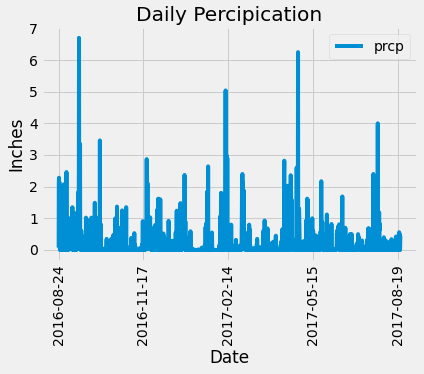

In [104]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

lastyear = session.query(M.date, M.prcp).\
    filter(M.date > '2016-08-23').\
    order_by(M.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(lastyear)

df.dropna(inplace=True)

# Sort the dataframe by date
df.sort_values(by=['date'])

grouped_dates = df.groupby(df['date'], as_index=False).mean()

ax = df.set_index(['date']).plot(title='Daily Percipication', xlabel='Date', ylabel='Inches', rot=90)

ax

fig = ax.get_figure()
fig.savefig("Output/Daily_percip.png")
# Use Pandas Plotting with Matplotlib to plot the data



In [63]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_stats = df['prcp'].describe()
df_stats

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [68]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(S.station).count()

print(f"There are {station_count} stations used in this dataset")

There are 9 stations used in this dataset


In [76]:
# What are the most active stations? (i.e. what stations have the most rows)?
freq_count = func.count(M.station)

freq_q = session.query(M.station, freq_count).group_by(M.station).order_by(freq_count.desc()).all()

# List the stations and the counts in descending order.
freq_q

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [85]:
most_freq = session.query(M.station, freq_count).group_by(M.station).order_by(freq_count.desc()).first()

#most_freq

most_freq_stn = most_freq[0]

most_freq_stn

'USC00519281'

In [90]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
## Find max/min of M.tobs and pull that ID as well

max_temp = session.query(M.station, func.max(M.tobs)).all()
min_temp = session.query(M.station, func.min(M.tobs)).all()

# highest temperature recorded, and average temperature of the most active station?
avg_temp = session.query(func.avg(M.tobs)).\
    filter(M.station == most_freq_stn).first()

#Print statements
print(f"The max temp recorded was {max_temp}")
print(f"The min temp recorded was {min_temp}")
print(f"The most active station had an average temp of {avg_temp}")

The max temp recorded was [('USC00519397', 87.0)]
The min temp recorded was [('USC00511918', 53.0)]
The most active station had an average temp of (71.66378066378067,)


In [99]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
freq_year_pull = session.query(M.date, M.station, M.tobs).\
    filter(M.date > '2016-08-23').\
    filter(M.station == most_freq_stn).\
    order_by(M.date).all()

df2 = pd.DataFrame(freq_year_pull)

df2.dropna(inplace=True)

df2.head()

,date,station,tobs
0,2016-08-24,USC00519281,77.0
1,2016-08-25,USC00519281,80.0
2,2016-08-26,USC00519281,80.0
3,2016-08-27,USC00519281,75.0
4,2016-08-28,USC00519281,73.0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

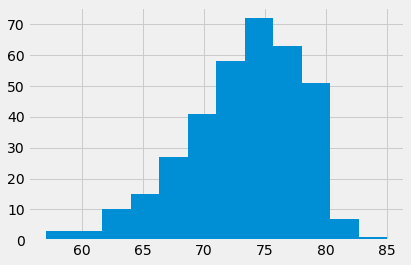

In [105]:
#Histogram

x = df2['tobs']

hist_range = ((x.min() - 2), (x.max() + 2))

plt.hist(x, bins=12, range=hist_range)
plt.savefig("Output/temp_hist.png")
plt.show()